In [17]:
import os
import zipfile

local_zip = 'heart_attack.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


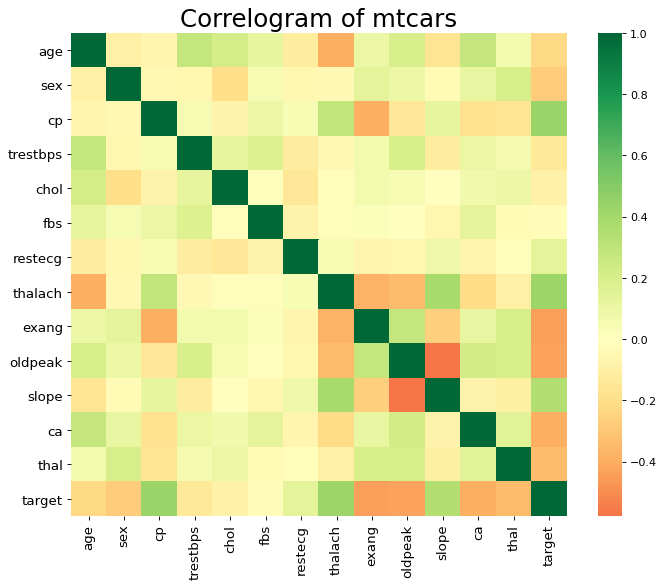

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(), cmap='RdYlGn', center=0)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [52]:
# Mean Encoding
cumsum = df.groupby('sex')['target'].cumsum() - df['target']
cumcnt = df.groupby('sex').cumcount()
df['sex'] = cumsum/cumcnt
cumsum = df.groupby('fbs')['target'].cumsum() - df['target']
cumcnt = df.groupby('fbs').cumcount()
df['fbs'] = cumsum/cumcnt
cumsum = df.groupby('thal')['target'].cumsum() - df['target']
cumcnt = df.groupby('thal').cumcount()
df['thal'] = cumsum/cumcnt
cumsum = df.groupby('ca')['target'].cumsum() - df['target']
cumcnt = df.groupby('ca').cumcount()
df['ca'] = cumsum/cumcnt
cumsum = df.groupby('oldpeak')['target'].cumsum() - df['target']
cumcnt = df.groupby('oldpeak').cumcount()
df['oldpeak'] = cumsum/cumcnt



In [53]:
df.isnull().sum()

age         0
sex         1
cp          0
trestbps    0
chol        0
fbs         1
restecg     0
thalach     0
exang       0
oldpeak     1
slope       0
ca          1
thal        1
target      0
dtype: int64

In [54]:
df=df.dropna()
from sklearn.model_selection import train_test_split
y = df['target']
X=df.drop('target', 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size = .2)

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1500, max_depth=10,
                        min_child_weight=0, gamma=0, subsample=0.52, colsample_bytree=1,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, 
                    seed=27, reg_alpha=5, reg_lambda=2, booster='gbtree',
            n_jobs=-1, max_delta_step=0, colsample_bylevel=1, colsample_bynode=1)
xgb.fit(X_train, y_train)
print('train accuracy',xgb.score(X_train, y_train))
print('test accuracy',xgb.score(X_test,y_test))

train accuracy 0.9901960784313726
test accuracy 1.0


In [57]:
col_sorted_by_importance=xgb.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':xgb.feature_importances_[col_sorted_by_importance]
})

#!pip install plotly-express
import plotly_express as px
px.bar(feat_imp, x='cols', y='imps')